# Задание 8

## 1. Wiki philosophy (0.5 баллов)
Существует шуточный «закон Философии» для статей Википедии: если переходить по
первой нормальной ссылке в статье, то рано или поздно мы придем на статью о философии.
Ваша задача заключается в том, чтобы проверить этот закон.
Для этого нужно написать программу, которая получает на вход ссылку на статью Википедии, а потом циклически переходит по первой нормальной ссылке и повторяет эту операцию
(до тех пор, пока не будет достигнута статья о философии, или ссылки не зациклятся). Нормальной ссылкой будем называть ссылку, которая находится в основном содержании статьи,
не в инфобоксах и не в служебных блоках, написана синим цветом (красный соответствует
несуществующей статье), не курсивом, не являтся сноской и не находится в скобках.

<b>Результат</b> должен представлять из себя несколько статистик (проверьте не менее 100 стр., <i>больше - лучше</i>):
* Описание алгоритма, как вы решали, стр. по философии или нет?
* Количество начальных ссылок vs Количество конечных тем страниц (0 - стр. не по философии, 1 - по философии).
* Гистограмма длин путей.
* Соотношений успешных и неуспешных запросов.
* Что еще можно тут придумать? :)

<b>Обратите внимание</b>, что для проверки нормальности не обязательно разбирать таблицы стилей и
проверять цвет и т.п., достаточно сделать, чтобы программа работала для текущей верстки
википедии (например, можно использовать атрибут class у тегов).
Для удобства проверки сделайте, чтобы последовательность переходов выводилась на
экран.

<b>Внимание.</b> Чтобы не создавать большую нагрузку на сервер Википедии, сделайте так,
чтобы ваша программа делала не более 2-х запросов в секунду. Для этого воспользуйтесь
функцией sleep из модуля time.

<b>PS</b> Лучше выполнять не в ipython notebook, а прислать отчет в pdf и код.

In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class WikiExplorer(object):
    def __init__(self):
        self.site = "https://en.wikipedia.org"
        
    def examine(self, request):
        soup = BeautifulSoup(request.content, 'html.parser')
        article_title = soup.body.find("h1", {"id": "firstHeading"}).text

        soup_body = soup.body \
            .find("div", {"id": "bodyContent"}) \
            .find("div", {"id": "mw-content-text"}) \
#             .find("div", {"class": "mw-parser-output"})
        for table in soup_body.find_all("table"):
            table.extract()

        is_about_philosophy = False
        if "philosoph" in soup_body.text:
            is_about_philosophy = True

        hrefs = soup_body.find_all("a", href=True)
        valid_links = [href["href"] for href in hrefs 
                       if not href.name.endswith("(page does not exist)") 
                       and not href["href"].startswith("#")]
        first_link = valid_links[0]
        return first_link, is_about_philosophy, article_title
    
    def explore(self, num_starts=100, max_depth=100):
        num_true = 0
        lens = []
        for i in tqdm(range(num_starts)):
            try:
                first_link = "/wiki/Special:Random"
                links = []
                titles = []
                is_about_philosophy = False
                depth = 0
                while depth < max_depth and not is_about_philosophy:
                    links.append(first_link)
                    url = self.site + first_link
                    request = requests.get(url)
                    if request.status_code != 200:
    #                     print("Some error occured! (No valid links)")
                        break
                    first_link, is_about_philosophy, article_title = self.examine(request)
                    titles.append(article_title)
                    if first_link in links:
    #                     print("Cycle!")
                        break
    #             print(links)
                if is_about_philosophy:
    #                 print('Success! Article "{}" is about philosophy!'.format(article_title))
                    num_true += 1
                    lens.append(len(links))
            except Exception:
                pass
        print("Total {} articles out from {} is about philosophy".format(num_true, num_starts))
        
        lens = np.array(lens)
        plt.hist(lens, bins='auto')
        plt.title("Histogram for lens of successful ways")
        plt.show()

100%|██████████| 100/100 [04:59<00:00,  2.99s/it]

Total 32 articles out from 100 is about philosophy
[ 2  5 10  2  2  9  2  3  9  2  2  8  2  2  5  2  2  4  2  2 10  2  4  2
  4  7  3  5  3  2  2  2]


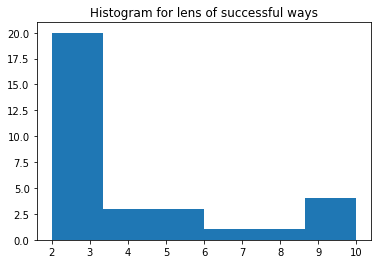

In [3]:
explorer = WikiExplorer()
explorer.explore()

## 2. Books lib (0.5 баллов)
Напишите сайт-библиотеку для книг. Он должен удовлетворять следующему функционалу:
* Иметь одну главную страницу со списком авторов и ниже их произведений.
* Можно кликнуть на автора и получить список его произведений на отдельной стр.
* Можно кликнуть на книгу и получить текст книги на отдельной стр.
* Оформление и улучшение функционала приветствуются. Но можно обойтись заголовками и ссылками.

<b>Особенности реализации</b>:
* Список книг и авторов заранее не задан и должен быть создан автоматически. (<i>как - понятно из следующего описания</i>)
* Все книги хранятся по каталогам, которые имеют имя автора.
* Каждая книга имеет название, которое и будет показано в ссылке.
* Архив с книгами в папке с заданием (books.zip).
* Плюсом будет, если вы "замайните" книги, вместо использования готового архива (+0.2 балла).
* Использовать flask и bootstrap стили.

<b>PS</b> Лучше выполнять не в ipython notebook, а прислать отчет в pdf и код.